In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

In [70]:
data = pd.read_csv('heart.csv').dropna()

In [71]:
data1 = data[['age', 'trestbps', 'thalach', 'target']]
data1

,age,trestbps,thalach,target
0,63,145,150,1
1,37,130,187,1
2,41,130,172,1
3,56,120,178,1
4,57,120,163,1
...,...,...,...,...
298,57,140,123,0
299,45,110,132,0
300,68,144,141,0
301,57,130,115,0


**Posterior 1**

In [72]:
posterior1_model = CmdStanModel(stan_file='posterior1.stan')
data_model = {'N': len(data1), 'age': data1.iloc[:, 0], 'bps': data1.iloc[:, 1], 'thalach': data1.iloc[:, 2]}
sim = posterior1_model.sample(data=data_model,
                        iter_sampling=1,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)
posterior1 = sim.draws_pd()

19:01:01 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

19:01:01 - cmdstanpy - INFO - CmdStan done processing.


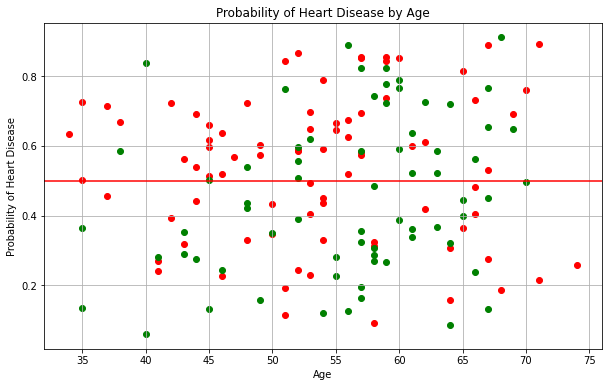

In [76]:
plt.figure(figsize=(10, 6))
for i in range(len(data1)):
    if i % 2:
        if data1.iloc[i, 3]: # people with heart disease
            plt.scatter(data1.iloc[i, 0], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='r')
        else:                # people without heart disease
            plt.scatter(data1.iloc[i, 0], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='g')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease by Age')
plt.axhline(y=0.5, color='red', linestyle='-')
plt.grid()
plt.show()

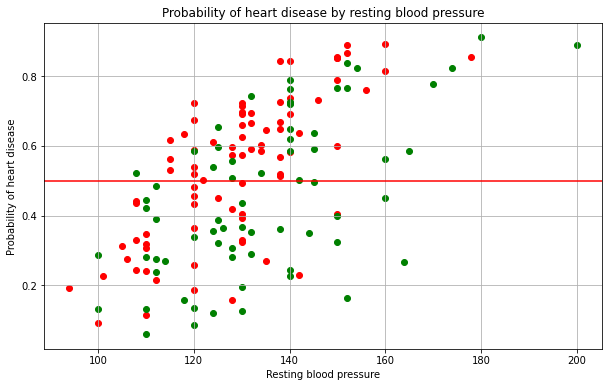

In [79]:
plt.figure(figsize=(10, 6))
for i in range(len(data1)):
    if i % 2:
        if data1.iloc[i, 3]:
            plt.scatter(data1.iloc[i, 1], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='r')
        else:
            plt.scatter(data1.iloc[i, 1], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='g')
plt.xlabel('Resting blood pressure')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by resting blood pressure')
plt.axhline(y=0.5, color='red', linestyle='-')
plt.grid()
plt.show()

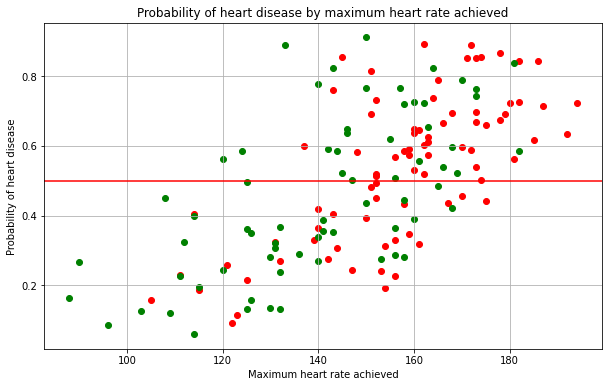

In [78]:
plt.figure(figsize=(10, 6))
for i in range(len(data1)):
    if i % 2:
        if data1.iloc[i, 3]:
            plt.scatter(data1.iloc[i, 2], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='r')
        else:
            plt.scatter(data1.iloc[i, 2], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='g')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by maximum heart rate achieved')
plt.axhline(y=0.5, color='red', linestyle='-')
plt.grid()
plt.show()